In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'/home/alberto/Scrivania/dropbox lavoro/miniprojects/new-york-estate/Queens.xlsx')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens
3,5259,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Queens
4,9736,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Briarwood,Queens


In [3]:
x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[]

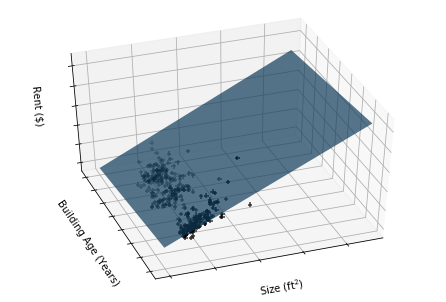

In [4]:
# Plot the figure

fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


In [5]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=50)
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(358, 14)
(90, 14)
(358, 1)
(90, 1)


In [6]:
# Create the model
mlr = LinearRegression()

# Fit the model
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_predict = mlr.predict(x_test)

In [19]:
my_apt_prediction = [[3, 1, 920, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(my_apt_prediction)

print("Predicted rent: $%.0f" % predict)
x = range(len(0,1))

Predicted rent: $2695


TypeError: len() takes exactly one argument (2 given)

ValueError: x and y must be the same size

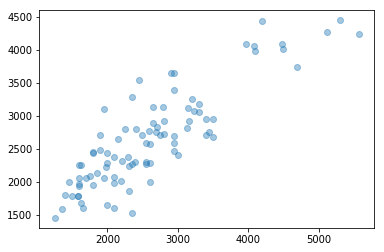

In [16]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.scatter(x,my_apt_prediction)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

In [ ]:
mlr.coef_

In [ ]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

In [ ]:
print("Train score:")
print(mlr.score(x_train, y_train))
print("Test score:")
print(mlr.score(x_test, y_test))


In [ ]:
residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()
